This jupyter-notebook has be created with 'jupytext'.

Use this [Link](https://colab.research.google.com/github/magnumnp/magnumnp_demos/blob/main/slonczewski1.ipynb) to directly open the Notebook in Google Colab.

## Install magnum.np and fetch reference data (required for Colab)

In [1]:
!pip install -q triton magnumnp
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/slonczewski1/ref/m.dat &> /dev/null

# Slonczewski STT Demo 1

Example taken from the Mumax3 paper: Vansteenkiste, Arne, et al. "The design and verification of MuMax3." AIP advances 4.10 (2014).
The team compared the results of Mumax3 with the results from oommf of a 160nm x 80nm x 5nm permalloy film. Non-zero epislon prime is used.
Implemented by Jed Cheng (jed.cheng@mag.ed.kyushu-u.ac.jp)

## Run Simulation

In [2]:
from magnumnp import *
import torch
import numpy as np
import pathlib
from tqdm import tqdm

set_log_level(25) # show info_green, but hide info_blue
Timer.enable()
try:
    this_dir = pathlib.Path(__file__).resolve().parent
except:
    this_dir = pathlib.Path().resolve()

# initialize state
dt = 5e-12
n = (64, 32, 1)
dx = (2.5e-9, 2.5e-9, 5e-9)
L = (n[0]*dx[0], n[1]*dx[1], n[2]*dx[2])
mesh = Mesh(n, dx)

state = State(mesh)
state.material = {
    "Ms": 8e5,
    "A": 1.3e-11,
    "alpha": 0.01,
    "P": 0.5669,
    "Lambda": 2,
    "epsilon_prime": 1,
    "mp": [np.cos(np.radians(20)), np.sin(np.radians(20)), 0],
    "d": L[2],
    "J": -4e11,
    }
state.m = state.Constant([1,0,0])

# initialize field terms
demag    = DemagField()
exchange = ExchangeField()
torque   = SpinTorqueSlonczewski()

# perform integration with spin torque
llg = LLGSolver([demag, exchange, torque])
logger = Logger(this_dir / "data", ['t', 'm'], ["m"], fields_every = 10)

for i in tqdm(torch.arange(0, 0.5e-9, dt)):
    llg.step(state, dt)
    logger << state

Timer.print_report()

2024-11-25 11:18:00  magnum.np:INFO magnum.np 2.0.1


2024-11-25 11:18:00  magnum.np:INFO [State] running on device: cpu (dtype = float64)


2024-11-25 11:18:00  magnum.np:INFO [Mesh] 64x32x1 (dx= 2.5e-09 x 2.5e-09 x 5e-09)


2024-11-25 11:18:00  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)


  0%|          | 0/101 [00:00<?, ?it/s]

  1%|          | 1/101 [00:11<19:14, 11.54s/it]

  2%|▏         | 2/101 [00:11<07:57,  4.82s/it]

  3%|▎         | 3/101 [00:11<04:21,  2.67s/it]

  5%|▍         | 5/101 [00:12<01:57,  1.22s/it]

  6%|▌         | 6/101 [00:12<01:26,  1.10it/s]

  7%|▋         | 7/101 [00:12<01:04,  1.46it/s]

  8%|▊         | 8/101 [00:12<00:48,  1.91it/s]

  9%|▉         | 9/101 [00:12<00:37,  2.45it/s]

 10%|▉         | 10/101 [00:12<00:29,  3.06it/s]

 11%|█         | 11/101 [00:12<00:24,  3.74it/s]

 12%|█▏        | 12/101 [00:12<00:20,  4.40it/s]

 13%|█▎        | 13/101 [00:13<00:17,  5.02it/s]

 14%|█▍        | 14/101 [00:13<00:15,  5.52it/s]

 15%|█▍        | 15/101 [00:13<00:14,  6.02it/s]

 16%|█▌        | 16/101 [00:13<00:13,  6.42it/s]

 17%|█▋        | 17/101 [00:13<00:12,  6.81it/s]

 18%|█▊        | 18/101 [00:13<00:11,  6.99it/s]

 19%|█▉        | 19/101 [00:13<00:11,  7.22it/s]

 20%|█▉        | 20/101 [00:14<00:11,  7.19it/s]

 21%|██        | 21/101 [00:14<00:11,  7.22it/s]

 22%|██▏       | 22/101 [00:14<00:10,  7.25it/s]

 23%|██▎       | 23/101 [00:14<00:10,  7.23it/s]

 24%|██▍       | 24/101 [00:14<00:10,  7.28it/s]

 25%|██▍       | 25/101 [00:14<00:10,  7.16it/s]

 26%|██▌       | 26/101 [00:14<00:10,  7.30it/s]

 27%|██▋       | 27/101 [00:14<00:10,  7.37it/s]

 28%|██▊       | 28/101 [00:15<00:09,  7.47it/s]

 29%|██▊       | 29/101 [00:15<00:09,  7.32it/s]

 30%|██▉       | 30/101 [00:15<00:09,  7.30it/s]

 31%|███       | 31/101 [00:15<00:09,  7.53it/s]

 32%|███▏      | 32/101 [00:15<00:09,  7.65it/s]

 33%|███▎      | 33/101 [00:15<00:09,  7.45it/s]

 34%|███▎      | 34/101 [00:15<00:08,  7.70it/s]

 35%|███▍      | 35/101 [00:16<00:08,  7.61it/s]

 36%|███▌      | 36/101 [00:16<00:08,  7.51it/s]

 37%|███▋      | 37/101 [00:16<00:08,  7.39it/s]

 38%|███▊      | 38/101 [00:16<00:08,  7.63it/s]

 39%|███▊      | 39/101 [00:16<00:08,  7.41it/s]

 40%|███▉      | 40/101 [00:16<00:08,  7.40it/s]

 41%|████      | 41/101 [00:16<00:08,  7.32it/s]

 42%|████▏     | 42/101 [00:16<00:08,  7.30it/s]

 43%|████▎     | 43/101 [00:17<00:07,  7.36it/s]

 44%|████▎     | 44/101 [00:17<00:07,  7.28it/s]

 45%|████▍     | 45/101 [00:17<00:07,  7.34it/s]

 46%|████▌     | 46/101 [00:17<00:07,  7.38it/s]

 47%|████▋     | 47/101 [00:17<00:07,  7.49it/s]

 48%|████▊     | 48/101 [00:17<00:07,  7.40it/s]

 49%|████▊     | 49/101 [00:17<00:07,  7.42it/s]

 50%|████▉     | 50/101 [00:18<00:07,  7.26it/s]

 50%|█████     | 51/101 [00:18<00:06,  7.22it/s]

 51%|█████▏    | 52/101 [00:18<00:06,  7.10it/s]

 52%|█████▏    | 53/101 [00:18<00:06,  7.12it/s]

 53%|█████▎    | 54/101 [00:18<00:06,  7.23it/s]

 54%|█████▍    | 55/101 [00:18<00:06,  7.24it/s]

 55%|█████▌    | 56/101 [00:18<00:06,  7.29it/s]

 56%|█████▋    | 57/101 [00:19<00:05,  7.42it/s]

 57%|█████▋    | 58/101 [00:19<00:05,  7.49it/s]

 58%|█████▊    | 59/101 [00:19<00:05,  7.69it/s]

 59%|█████▉    | 60/101 [00:19<00:05,  7.49it/s]

 60%|██████    | 61/101 [00:19<00:05,  7.44it/s]

 61%|██████▏   | 62/101 [00:19<00:05,  7.42it/s]

 62%|██████▏   | 63/101 [00:19<00:05,  7.43it/s]

 63%|██████▎   | 64/101 [00:19<00:04,  7.60it/s]

 64%|██████▍   | 65/101 [00:20<00:04,  7.63it/s]

 65%|██████▌   | 66/101 [00:20<00:04,  7.46it/s]

 66%|██████▋   | 67/101 [00:20<00:04,  7.31it/s]

 67%|██████▋   | 68/101 [00:20<00:04,  7.21it/s]

 68%|██████▊   | 69/101 [00:20<00:04,  7.08it/s]

 69%|██████▉   | 70/101 [00:20<00:04,  7.22it/s]

 70%|███████   | 71/101 [00:20<00:04,  7.04it/s]

 71%|███████▏  | 72/101 [00:21<00:04,  7.21it/s]

 72%|███████▏  | 73/101 [00:21<00:03,  7.16it/s]

 73%|███████▎  | 74/101 [00:21<00:03,  7.25it/s]

 74%|███████▍  | 75/101 [00:21<00:03,  7.29it/s]

 75%|███████▌  | 76/101 [00:21<00:03,  7.09it/s]

 76%|███████▌  | 77/101 [00:21<00:03,  6.94it/s]

 77%|███████▋  | 78/101 [00:21<00:03,  7.23it/s]

 78%|███████▊  | 79/101 [00:22<00:03,  7.32it/s]

 79%|███████▉  | 80/101 [00:22<00:02,  7.26it/s]

 80%|████████  | 81/101 [00:22<00:02,  6.98it/s]

 81%|████████  | 82/101 [00:22<00:02,  7.18it/s]

 82%|████████▏ | 83/101 [00:22<00:02,  7.20it/s]

 83%|████████▎ | 84/101 [00:22<00:02,  7.02it/s]

 84%|████████▍ | 85/101 [00:22<00:02,  7.16it/s]

 85%|████████▌ | 86/101 [00:23<00:02,  6.98it/s]

 86%|████████▌ | 87/101 [00:23<00:02,  6.77it/s]

 87%|████████▋ | 88/101 [00:23<00:01,  6.98it/s]

 88%|████████▊ | 89/101 [00:23<00:01,  7.09it/s]

 89%|████████▉ | 90/101 [00:23<00:01,  7.00it/s]

 90%|█████████ | 91/101 [00:23<00:01,  7.11it/s]

 91%|█████████ | 92/101 [00:23<00:01,  7.07it/s]

 92%|█████████▏| 93/101 [00:24<00:01,  7.18it/s]

 93%|█████████▎| 94/101 [00:24<00:00,  7.32it/s]

 94%|█████████▍| 95/101 [00:24<00:00,  7.25it/s]

 95%|█████████▌| 96/101 [00:24<00:00,  7.17it/s]

 96%|█████████▌| 97/101 [00:24<00:00,  7.10it/s]

 97%|█████████▋| 98/101 [00:24<00:00,  6.97it/s]

 98%|█████████▊| 99/101 [00:24<00:00,  7.02it/s]

 99%|█████████▉| 100/101 [00:25<00:00,  7.07it/s]

100%|██████████| 101/101 [00:25<00:00,  7.23it/s]

100%|██████████| 101/101 [00:25<00:00,  4.02it/s]


TIMER REPORT
Operation                      No of calls    Avg time [ms]    Total time [s]
---------------------------  -------------  ---------------  ----------------
LLGSolver.step                         101       244.319             24.6762
    DemagField.h                      8520         1.00016            8.52134
    ExchangeField.h                   8520         1.07262            9.13873
    SpinTorqueSlonczewski.h           8520         0.450508           3.83833
---------------------------  -------------  ---------------  ----------------
Total                                                                25.1551
Missing                                                               0.4789



## Plot Results

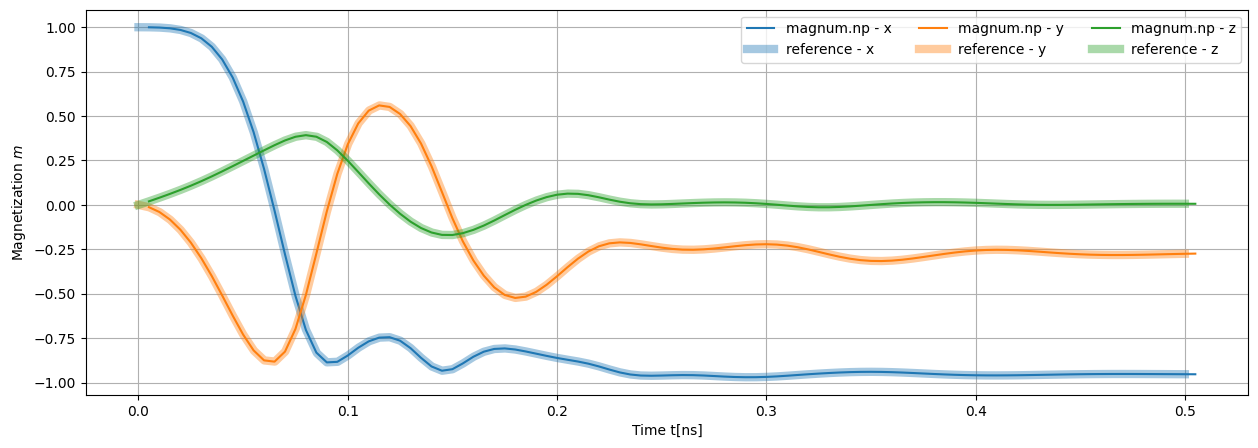

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/log.dat")
ref = np.load("ref/M_mx3_1.npy")
#ref = np.load("ref/M_oommf_1.npy") # OOMMF and mumax3 perfectly agree

fig, ax = plt.subplots(figsize=(15,5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,0]*1e9, data[:,1], '-', color = cycle[0], label = "magnum.np - x")
ax.plot(ref[0]*1e9, ref[1], '-', color = cycle[0], linewidth = 6, alpha = 0.4, label = "reference - x")

ax.plot(data[:,0]*1e9, data[:,2], '-', color = cycle[1], label = "magnum.np - y")
ax.plot(ref[0]*1e9, ref[2], '-', color = cycle[1], linewidth = 6, alpha = 0.4, label = "reference - y")

ax.plot(data[:,0]*1e9, data[:,3], '-', color = cycle[2], label = "magnum.np - z")
ax.plot(ref[0]*1e9, ref[3], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference - z")

ax.set_xlabel("Time t[ns]")
ax.set_ylabel("Magnetization $m$")
ax.legend(ncol=3)
ax.grid()
fig.savefig("data/results.png")